# Example: Static Bertrand Game

Note: the game may be with *perfect substitutes* (pure Bertrand) or *imperfect substitutes* (differentiated Bertrand).  

* Write player functions, `player1.py`, `player2.py`, ... in the folder `./players/`. 
* Run this notebook: it will automatically read them all.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%load_ext autoreload
%autoreload 2 
from game_tournament.game import StaticBertrandGame, Tournament

# Reading in player modules 

In [2]:
# later, we will give the path directly to a function
player_path = './examples/players_static/'

# General setup, common across specifications 

* **Marginal cost:** $c = 0.5$ 
* **Action space:** $p \in [c; 6]$

In [15]:
c = 0.5
pmin = c
pmax = 6.

# Part 1: Imperfect substitutes (differentiated Bertrand)
$$ D_i(p_i, p_j) = \frac{\exp(\beta_0 - \beta_1 p_i)}{1 + \exp(\beta_0-\beta_1p_i) + \exp(\beta_0-\beta_1 p_j)} $$

In [16]:
def demand(p1, p2): 
    '''
    Args
        p1,p2: prices 
    Returns: 
        demand to firm 1
    '''
    b0 = 5.
    b1 = 2.
    u1 = np.exp(b0-b1*p1)
    u2 = np.exp(b0-b1*p2)
    u0 = 1.0 
    
    denom = u0 + u1 + u2
    
    # market shares 
    s1 = u1/denom 
    s2 = u2/denom
    
    return s1,s2

def profit1(p1, p2):
    # c is read in as a global 
    s1,s2 = demand(p1,p2)
    return s1*(p1-c)

def profit2(p2, p1): # note the order of inputs! 
    s1,s2 = demand(p1,p2)
    return s2*(p2-c)

## Experimenting with player functions

In [17]:
from scipy.optimize import minimize_scalar 

In [18]:
# fill a linear grid with the values of a possibly non-vectorizable function 
def fill_array(xmin, xmax, numx, fhandle): 
    xx = np.linspace(xmin, xmax, numx) 
    yy = np.empty(xx.shape)
    for i,x in enumerate(xx): 
        yy[i] = fhandle(x)
    return xx,yy

# plot the results 
def plot_grid(xmin, xmax, numx, fhandle, **kwargs): 
    xx,yy = fill_array(xmin, xmax, numx, fhandle)
    plt.plot(xx,yy,**kwargs)

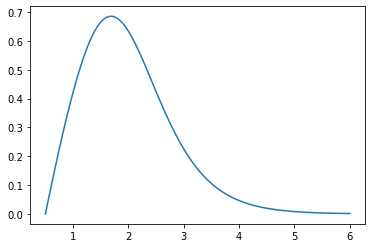

In [19]:
f = lambda p1: profit1(p1, 2.0) # fixing p2 = 2.0 
plot_grid(pmin,pmax,100,f)

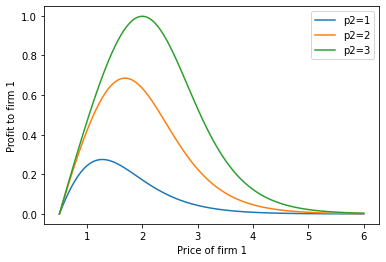

In [21]:
for p2 in [1,2,3]:
    f = lambda p1 : profit1(p1, p2)
    plot_grid(pmin, pmax, 100, f, label=f'p2={p2}')
plt.legend();
plt.ylabel('Profit to firm 1');plt.xlabel('Price of firm 1');

### Let's experiment

In [22]:
c = 0.5
pmin = c
pmax = 6.

In [33]:
def pi1_first_order(p1): 
    np.random.seed(1)
    p2s = np.random.uniform(pmin, pmax, size=100)
    pi1s = np.empty(p2s.shape)
    for i,p2 in enumerate(p2s): 
        pi1s[i] = profit1(p1, p2)
    return np.mean(pi1s)

pi1_first_order(2)

0.7997088004057098

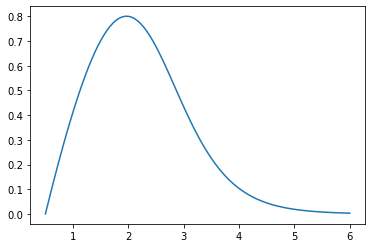

In [40]:
plot_grid(pmin, pmax, 100, pi1_first_order)

In [41]:
f = lambda x : -pi1_first_order(x)
res = minimize_scalar(f, bounds=(pmin,pmax), options={'maxiter':20})
res.x
res

     fun: -0.8002740996637848
    nfev: 13
     nit: 8
 success: True
       x: 1.9653122718118858

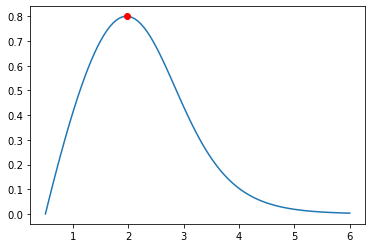

In [42]:
plot_grid(pmin, pmax, 100, pi1_first_order)
plt.plot(res.x, pi1_first_order(res.x), 'or');

# Running a single game

We start by directly importing two specific player functions and setting them up to compete against one another. 

In [46]:
# Direct import statements 
from examples.players_static.player1 import player as player1
from examples.players_static.player2 import player as player2
print(f'Player 1: {player1.name}')
print(f'Player 2: {player2.name}')

Player 1: 0th order
Player 2: First-order


In [47]:
# initialize instances of two player functions
p1 = player1()
p2 = player2()

# define the game 
price_range = (0.0, 5.0)
G = StaticBertrandGame(p1, p2, profit1, profit2, price_range)
print(G)

0th order vs. First-order: played 0 rounds


Now let us play `T = 100` rounds of the game. 

In [48]:
G.play_game(T=100)

In [51]:
# Now the history property has been populated
G.history

array([[4.99816257, 1.91667851],
       [4.19284243, 1.91667851],
       [4.05207345, 1.91667851],
       [0.84271137, 1.91667851],
       [2.71090546, 1.91667851],
       [0.62099935, 1.91667851],
       [4.45109563, 1.91667851],
       [0.46469234, 1.91667851],
       [1.09380665, 1.91667851],
       [0.92962354, 1.91667851],
       [2.59545796, 1.91667851],
       [0.97992324, 1.91667851],
       [2.67267498, 1.91667851],
       [4.0320707 , 1.91667851],
       [3.1762614 , 1.91667851],
       [4.19404809, 1.91667851],
       [0.40933108, 1.91667851],
       [0.80834155, 1.91667851],
       [2.58077153, 1.91667851],
       [2.2771192 , 1.91667851],
       [0.43554145, 1.91667851],
       [3.33097255, 1.91667851],
       [1.71524239, 1.91667851],
       [1.35348592, 1.91667851],
       [3.89124841, 1.91667851],
       [0.4452692 , 1.91667851],
       [2.86333858, 1.91667851],
       [2.05462569, 1.91667851],
       [2.22221641, 1.91667851],
       [2.01752971, 1.91667851],
       [3.

In [52]:
# we can use this function to print a nice table (a pandas dataframe is returned)
tab = G.get_game_actions_and_payoffs()
tab 

actions               payoffs            
      0th order First-order 0th order First-order
Round                                            
0      4.998163    1.916679  0.007212    1.078539
1      4.192842    1.916679  0.029451    1.071656
2      4.052073    1.916679  0.037442    1.068884
3      0.842711    1.916679  0.297215    0.143410
4      2.710905    1.916679  0.297930    0.934699
...         ...         ...       ...         ...
95     0.840050    1.916679  0.295115    0.142749
96     0.124879    1.916679 -0.361938    0.037966
97     0.733684    1.916679  0.208074    0.118392
98     1.571865    1.916679  0.646474    0.428727
99     3.783082    1.916679  0.058824    1.060915

[100 rows x 4 columns]

Averaging over the rounds, we can find the best performing player of the two. 

In [53]:
tab.mean(0).payoffs.round(4) # average over the 10 rounds we played 

0th order      0.2070
First-order    0.6117
dtype: float64

# Running a Tournament

This will run a full tournament between all the player functions found in the folder `player_path`. 

In [54]:
T = 100
game_data = {'profit_function1':profit1, 'profit_function2':profit2, 'price_range': (pmin,pmax)
}
t = Tournament(player_path, StaticBertrandGame, game_data=game_data, T=T, tournament_name='Total', )
t.run() # run the tournament and score the game 

3it [00:01,  2.45it/s]

Tournament winner was: First-order (against 2 opponents)


,Total
Player,
First-order,0.746938
BR to midpoint,0.722192
0th order,0.212323


In [55]:
matchup_results = t.get_matchup_results()
matchup_results

Opponent,0th order,BR to midpoint,First-order
Player,,,
0th order,NaN,0.219710,0.204936
BR to midpoint,0.813252,NaN,0.631132
First-order,0.879522,0.614353,NaN


Print the matchup results to see if there is a pattern in who is good against whom. 

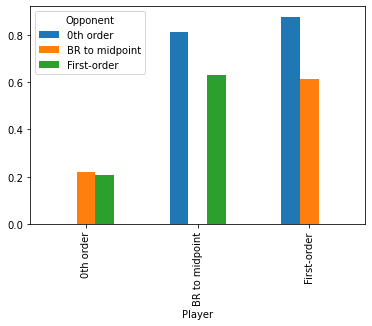

In [56]:
matchup_results.plot.bar(); 

# Part 2: Near-perfect Substitutes
$$ D_i(p_i, p_j) = \frac{\exp(\beta_0 - \beta_1 p_i + \beta_2 R(p_i,p_j))}{1 + \exp(\beta_0-\beta_1p_i + \beta_2 R(p_i,p_j)) + \exp(\beta_0-\beta_1 p_j + \beta_2 R(p_j,p_i)) } $$

where the Recommendation-effect, $R$, is an attraction to the cheapest product: 

$$ 
R(p_i,p_j) = 
\begin{cases}
1 & \text{if } p_i < p_j \\
\frac{1}{2} & \text{if } p_i = p_j \\
0 & \text{if } p_i > p_j.
\end{cases}
$$

Note that $R$ is a discontinuous function, which results in $D(p_i, p_j)$ being discontinuous. 

In [66]:
def demand(p1, p2): 
    '''
    Args
        p1,p2: prices 
    Returns: 
        demand to firm 1
    '''
    b0 = 5.
    b1 = 2.
    b2 = 2.
    S1 = 1.*(p1<p2) + 0.5*(p1==p2)
    S2 = 1.*(p2<p1) + 0.5*(p1==p2)
    u1 = np.exp(b0-b1*p1+b2*S1)
    u2 = np.exp(b0-b1*p2+b2*S2)
    u0 = 1.0 
    
    denom = u0 + u1 + u2
    
    # market shares 
    s1 = u1/denom 
    s2 = u2/denom
    
    return s1,s2

def profit1(p1, p2):
    # c is read in as a global 
    s1,s2 = demand(p1,p2)
    return s1*(p1-c)

def profit2(p2, p1): # note the order of inputs! 
    s1,s2 = demand(p1,p2)
    return s2*(p2-c)

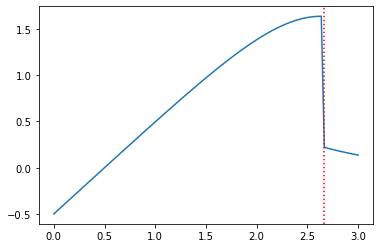

In [131]:
f = lambda p1: profit1(p1, p2=2.66) # fixing p2 = 2.0 
plot_grid(0,3,100,f)
plt.axvline(2.66,linestyle=':',color='r');

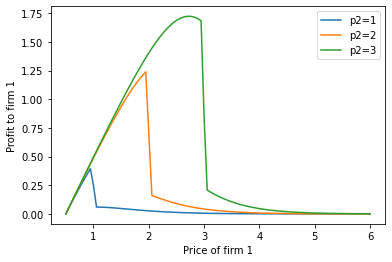

In [74]:
for p2 in [1,2,3]:
    f = lambda p1 : profit1(p1, p2)
    plot_grid(pmin, pmax, 100, f, label=f'p2={p2}')
plt.legend();
plt.ylabel('Profit to firm 1');plt.xlabel('Price of firm 1');

### Let's experiment

In [114]:
c = 0.5
pmin = c
pmax = 6.

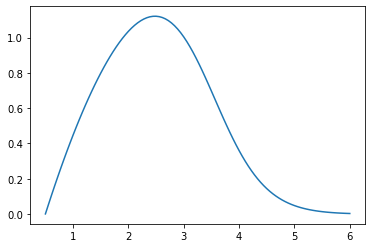

In [115]:
def pi1_first_order(p1): 
    p2s = np.linspace(pmin, pmax, 100)
    #p2s = np.array([2., 3., 1., 4., 3.5, 2.5, 1.5, 1.6, 2.3, 2.6, 3.1, 1.8])
    #np.random.seed(3)
    #p2s = np.random.uniform(pmin, pmax, 100)
    pi1s = np.empty(p2s.shape)
    for i,p2 in enumerate(p2s): 
        pi1s[i] = profit1(p1, p2)
    return np.mean(pi1s)

plot_grid(pmin, pmax, 100, pi1_first_order)

In [117]:
f = lambda x : -pi1_first_order(x)
res = minimize_scalar(f, bounds=(pmin,pmax), options={'maxiter':10})
res.x

2.4425091010555655

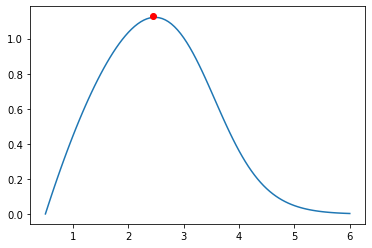

In [118]:
plot_grid(pmin, pmax, 100, pi1_first_order)
plt.plot(res.x, pi1_first_order(res.x), 'or');

## Tournament

In [119]:
T = 100 # just to smooth out randomness
game_data = {'profit_function1':profit1, 'profit_function2':profit2, 'price_range': (pmin,pmax)
}
t = Tournament(player_path, StaticBertrandGame, game_data=game_data, T=T, tournament_name='Total', )
t.run() # run the tournament and score the game 

3it [00:07,  2.58s/it]

Tournament winner was: BR to midpoint (against 2 opponents)


,Total
Player,
BR to midpoint,1.386665
First-order,0.595148
0th order,0.437482


In [124]:
g = t.games[2]

In [127]:
print(g)

BR to midpoint vs. First-order: played 100 rounds


In [129]:
g.history[0,:]

array([2.66228987, 2.68220974])